In [14]:
import os
import glob
import numpy as np
import skimage.external.tifffile as skext
from skimage.feature import register_translation 
import scipy.io

In [2]:
fnames_all=[]
for file in glob.glob(os.path.join('D:/temp/ANTs_Flow/Kevin','hs_2*.tif')):
    if file.endswith(".tif") and (file.find('Kmean')==-1):
        fnames_all.append(file)
FishNames=list(set([s.partition("hs_")[2].partition('.tif')[0] for s in fnames_all]))
FishNames

['2planes_f2', '2planes_f1']

In [4]:
dest=skext.imread('D:/temp/Kevin/hs_basic14.tif')
orig=skext.imread('D:/temp/Kevin/hs_basic23.tif')
dest.shape

(15, 1080, 1280)

In [6]:
dest=skext.imread('D:/temp/Kevin/hs_basic14.tif')
orig=skext.imread('D:/temp/Kevin/hs_basic23.tif')
transform_matrix=[]
for i in range(0,dest.shape[0]):
    tform = register_translation(dest[i],orig[i])        
    transform_matrix.append(tform[0])

D:\Continuum\anaconda3\lib\site-packages\skimage\feature\register_translation.py:105: RuntimeWarning: invalid value encountered in cdouble_scalars
  (src_amp * target_amp)


In [44]:
cropped_files=[]
for file in glob.glob(os.path.join('D:/Pictures/processed/Flow/Basic/','AVG_F*.tif')):
    if file.endswith(".tif") and (file.find('Kmean')==-1):
        cropped_files.append(file)
len(cropped_files)

10

In [124]:
cropped_files=[]
for file in glob.glob(os.path.join('D:/Pictures/processed/Flow/Basic/','AVG_*.tif')):
    if file.endswith(".tif") and (file.find('Kmean')==-1):
        cropped_files.append(file)
len(cropped_files)

157

In [125]:
s=cropped_files[0]
s

'D:/Pictures/processed/Flow/Basic\\AVG_12_0.tif'

In [36]:
s

'D:/Pictures/processed/Flow/Basic\\AVG_Flow_2planes_f1-0um.tif'

In [76]:
transform_matrix=[]
file_name=[]
for i in range(0,len(FishNames)):
    matches = [s for s in cropped_files if FishNames[i] in str(s.partition('AVG_Flow_')[2].partition('-')[0])]
    dest=skext.imread('D:/temp/ANTs_Flow/Kevin\\hs_'+FishNames[i]+'.tif')    
    for image_name in matches:
        slice_nb=int(int(image_name.partition(FishNames[i]+'-')[2].partition('um.tif')[0])/20)        
    #if slice_nb>0:
        frame = skext.imread(image_name)
        frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
        tform = register_translation(dest[slice_nb],frame)        
        transform_matrix.append(tform[0])
        file_name.append(image_name)
scipy.io.savemat('D:/temp/ANTs_Flow/Kevin/transformation_crop_to_full_2planes.mat', mdict={'TransfoMatrix':transform_matrix,'FileName':file_name})

In [88]:
slice_nb

4

In [50]:
len(transform_matrix)

10

In [3]:
dest=skext.imread('D:/temp/ANTs_Flow/Kevin/hs_2planes_f1.tif')

In [95]:
file_name=[]
for i in range(0,len(FishNames)):
    matches = [s for s in cropped_files if FishNames[i] in str(s.partition('AVG_')[2].partition('_')[0])]
    for image_name in matches:
        slice_nb=int(int(image_name.partition(FishNames[i]+'_')[2].partition('.tif')[0])/20)
        file_name.append(image_name)

In [98]:
scipy.io.savemat('D:/temp/Kevin/transformation_crop_to_full.mat', mdict={'TransfoMatrix':transform_matrix,'FileName':file_name})

In [12]:
len(file_name)

147

In [27]:
FishNames

['2planes_f2', '2planes_f1']

In [8]:
i=0
matches = [s for s in cropped_files if FishNames[i] in str(s.partition('AVG_Flow_')[2].partition('-')[0])]
matches

['D:/Pictures/processed/Flow/Basic\\AVG_Flow_2planes_f2-0um.tif',
 'D:/Pictures/processed/Flow/Basic\\AVG_Flow_2planes_f2-20um.tif']

In [50]:
dest=skext.imread('D:/temp/Kevin\\hs_basic'+FishNames[i]+'.tif')    

In [87]:
transform_matrix

[array([ -1., 228.]),
 array([ -1., 249.]),
 array([ -2., 219.]),
 array([ 12., 269.]),
 array([ 30., 300.]),
 array([ 77., 306.]),
 array([ -1., 219.]),
 array([  0., 234.]),
 array([  1., 238.]),
 array([  0., 251.])]

In [52]:
for image_name in matches:
    slice_nb=int(int(image_name.partition(FishNames[i]+'_')[2].partition('.tif')[0])/20) 
    frame = skext.imread(image_name)
    frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
    tform = register_translation(dest[slice_nb],frame)        
    transform_matrix.append(tform[0])
    file_name.append(image_name)

In [89]:
slice_nb=0
frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
tform = register_translation(dest[slice_nb],frame)     

In [90]:
tform

(array([ -2., 219.]), 0.709653357213974, 9.324149359749524e-18)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
frame = skext.imread(matches[0])
frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')

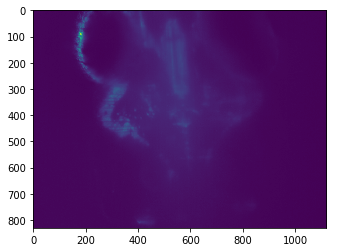

In [6]:
plt.imshow(dest[0])

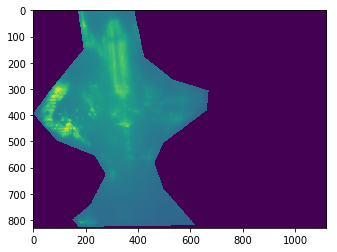

In [92]:
plt.imshow(frame)

In [93]:
frame=np.pad(frame,((0,abs(dest[0].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
tform = register_translation(dest[0],frame) 
tform

(array([ -2., 219.]), 0.709653357213974, 9.324149359749524e-18)

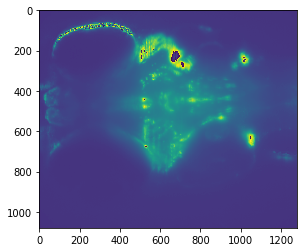

In [62]:
slice_nb=int(int(image_name.partition(FishNames[i]+'_')[2].partition('.tif')[0])/20) 
plt.imshow(dest[slice_nb]*100)

In [82]:
tform = register_translation(dest[slice_nb],frame)
tform

(array([-14., 213.]), 0.5829386071154125, -1.3519965914102717e-17)

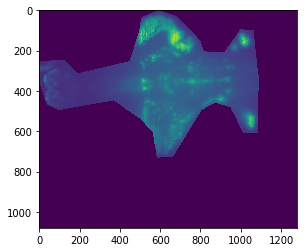

In [64]:
plt.imshow(np.roll(frame,1280+int(tform[0][1]),axis=1))

In [16]:
cropped_files[0]


'D:/Pictures/processed/Flow/Basic\\AVG_Flow_2planes_f1-0um.tif'

In [17]:
slice_nb=0
frame = skext.imread(cropped_files[0])
frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
tform = register_translation(dest[slice_nb],frame)        
transform_matrix.append(tform[0])

In [104]:
tform = register_translation(dest[slice_nb],frame)
tform[0]

array([ -2., 219.])

In [101]:
frame2=np.roll(np.roll(frame,int(tform[0][1]),axis=1),int(tform[0][0]),axis=0)

In [102]:
np.where(frame==frame.max())

(array([331], dtype=int64), array([76], dtype=int64))

In [103]:
np.where(frame2==frame2.max())

(array([329], dtype=int64), array([295], dtype=int64))

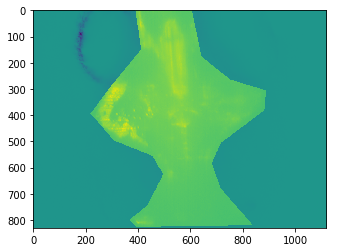

In [94]:
plt.imshow(np.roll(frame/frame.max(),int(tform[0][1]),axis=1)-(dest[slice_nb].astype(np.float))/dest[slice_nb].max())

In [121]:
frame.shape

(830, 1120)

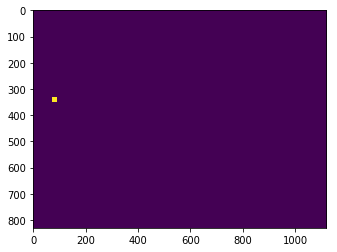

In [118]:
temp=np.zeros(frame.shape)
temp[332:352,72:92]=100
plt.imshow(temp)

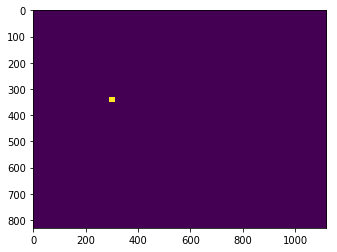

In [119]:
plt.imshow(np.roll(np.roll(temp,int(tform[0][1]),axis=1),int(tform[0][0]),axis=0))

In [123]:
tform[0][1]

219.0

In [120]:
tform[0][0]

(array([330, 330, 330, 330, 330, 330, 330, 330, 330, 330, 330, 330, 330,
        330, 330, 330, 330, 330, 330, 330, 331, 331, 331, 331, 331, 331,
        331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331,
        331, 332, 332, 332, 332, 332, 332, 332, 332, 332, 332, 332, 332,
        332, 332, 332, 332, 332, 332, 332, 332, 333, 333, 333, 333, 333,
        333, 333, 333, 333, 333, 333, 333, 333, 333, 333, 333, 333, 333,
        333, 333, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334,
        334, 334, 334, 334, 334, 334, 334, 334, 334, 335, 335, 335, 335,
        335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335,
        335, 335, 335, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336,
        336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 337, 337, 337,
        337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337,
        337, 337, 337, 337, 338, 338, 338, 338, 338, 338, 338, 338, 338,
        338, 338, 338, 338, 338, 338, 338, 338, 338

D:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


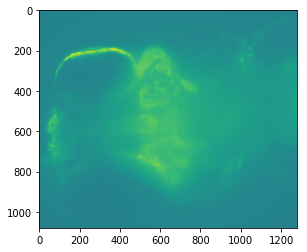

In [128]:
dest=skext.imread('D:/temp/ANTs_Flow/Kevin/hs_basic12.tif')
plt.imshow(np.log10(dest[0]))

In [129]:
slice_nb=0
frame = skext.imread(s)
frame=np.pad(frame,((0,abs(dest[slice_nb].shape[0]-frame.shape[0])),(0,abs(dest[slice_nb].shape[1]-frame.shape[1]))),'constant')
tform = register_translation(dest[slice_nb],frame)     
tform[0]

array([162.,  18.])

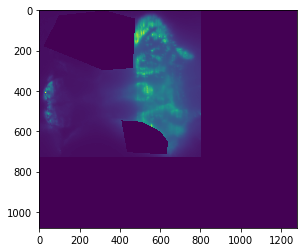

In [131]:
plt.imshow(frame)

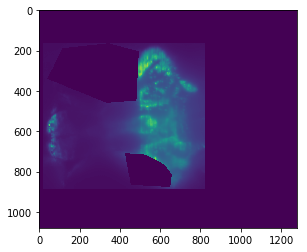

In [132]:
frame2=np.roll(np.roll(frame,int(tform[0][1]),axis=1),int(tform[0][0]),axis=0)
plt.imshow(frame2)

D:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


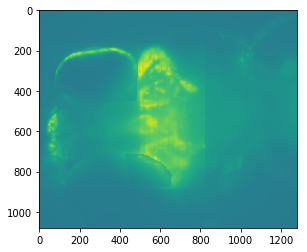

In [138]:
plt.imshow(frame2/1000+np.log(dest[slice_nb]))

In [2]:
import nrrd
C1_img, C1_header = nrrd.read('D:\Pictures\Lactation\Selected pieces\C1-MAX_F13_Piece5.nrrd')
C2_img, C2_header = nrrd.read('D:\Pictures\Lactation\Selected pieces\C2-MAX_F13_Piece5.nrrd')

In [14]:
C2_img.shape

(512, 512, 400)

In [55]:
C1_img=skext.imread('D:\Pictures\Lactation\Selected pieces\C1-MAX-F75_5.tif')
C2_img=skext.imread('D:\Pictures\Lactation\Selected pieces\C2-MAX-F75_5.tif')

In [56]:
dest=C2_img[0,:,:]
transform_matrix=[]
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[0]):
    tform = register_translation(dest,C2_img[i],100)        
    transform_matrix.append(tform[0])
    img_corr = fourier_shift(np.fft.fftn(C2_img[i]), tform[0])
    mov_corr[i] = np.fft.ifftn(img_corr).real
skext.imsave('D:\Pictures\Lactation\Selected pieces\C2-MAX-F75_5_reg.tif',mov_corr.round().astype('int16'))

In [58]:
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[0]):        
    img_corr = fourier_shift(np.fft.fftn(C1_img[i]), transform_matrix[i])
    mov_corr[i] = np.fft.ifftn(img_corr).real    
skext.imsave('D:\Pictures\Lactation\Selected pieces\C1-MAX-F75_5_reg.tif',mov_corr.round().astype('int16'))

In [15]:
dest=C2_img[0]
tform = register_translation(dest,C2_img[10],100)        
tform

(array([0.36, 0.08]), 0.16898926054133392, -2.6049574612613522e-06)

In [3]:
from scipy.ndimage import fourier_shift
dest=C2_img[:,:,0]
transform_matrix=[]
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[2]):
    tform = register_translation(dest,C2_img[:,:,i],100)        
    transform_matrix.append(tform[0])
    img_corr = fourier_shift(np.fft.fftn(C2_img[:,:,i]), tform[0])
    mov_corr[:,:,i] = np.fft.ifftn(img_corr).real
nrrd.write('D:\Pictures\Lactation\Selected pieces\C2-MAX-F13_5_reg.nrrd',mov_corr.round(),C2_header)
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[2]):        
    img_corr = fourier_shift(np.fft.fftn(C1_img[:,:,i]), transform_matrix[i])
    mov_corr[:,:,i] = np.fft.ifftn(img_corr).real    
nrrd.write('D:\Pictures\Lactation\Selected pieces\C1-MAX-F13_5_reg.nrrd',mov_corr.round(),C1_header)

In [15]:
from skimage.transform import warp, estimate_transform

dest=C2_img[:,:,0]
transform_matrix=[]
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[2]):
    tform = register_translation(dest,C2_img[:,:,i],1000)        
    transform_matrix.append(tform[0])
    img_corr = fourier_shift(np.fft.fftn(C2_img[:,:,i]), tform[0])
    mov_corr[:,:,i] = np.fft.ifftn(img_corr).real
nrrd.write('D:\Pictures\Lactation\Selected pieces\C2-MAX-F13_5_reg.nrrd',mov_corr.round(),C2_header)
mov_corr=np.zeros(C2_img.shape)
for i in range(0,C2_img.shape[2]):        
    img_corr = fourier_shift(np.fft.fftn(C1_img[:,:,i]), transform_matrix[i])
    mov_corr[:,:,i] = np.fft.ifftn(img_corr).real    
nrrd.write('D:\Pictures\Lactation\Selected pieces\C1-MAX-F13_5_reg.nrrd',mov_corr.round(),C1_header)

In [44]:
skext.imsave('D:\Pictures\Lactation\Selected pieces\C2-MAX-F75_5_reg.tif',mov_corr.round().astype('int16'))

In [12]:
nrrd.write('D:\Pictures\Lactation\Selected pieces\C2-MAX-F13_5_reg.nrrd',mov_corr.round(),C2_header)

In [43]:
mov_corr.round().astype('int16').max()

1326

In [45]:
fnames_all=[]
for file in glob.glob('D:\Pictures\Lactation\K5xGCxtdtom Gestation Files\C2*.tif', recursive=False):    
    fnames_all.append(file)
fnames_all

['D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2-MAX_s4 tdtomgest.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2-MAX_s4 tdtomgest_Reg.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2-MAX_s8 tdtomgest.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2-MAX_s8 tdtomgest_Reg.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2_MAX_F14_Gest.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2_MAX_F24_Gest.tif',
 'D:\\Pictures\\Lactation\\K5xGCxtdtom Gestation Files\\C2_MAX_F6_Gest.tif']

In [10]:
selected_files=[0, 3 ,4]
for file_nb in selected_files:
    fnames_all[file_nb]

In [39]:
selected_files=[0,1]

In [36]:
from scipy.ndimage import fourier_shift
import nrrd

for file_nb in selected_files:
    C2_img, C2_header = nrrd.read(fnames_all[file_nb])
    C1_img, C1_header = nrrd.read(fnames_all[file_nb].replace('C2','C1'))    
    dest=C2_img[:,:,0]
    transform_matrix=[]
    mov_corr=np.zeros(C2_img.shape)
    for i in range(0,C2_img.shape[2]):
        tform = register_translation(dest,C2_img[:,:,i],100)        
        transform_matrix.append(tform[0])
        img_corr = fourier_shift(np.fft.fftn(C2_img[:,:,i]), tform[0])
        mov_corr[:,:,i] = np.fft.ifftn(img_corr).real
    nrrd.write(fnames_all[file_nb].replace('.nrrd','_Reg.nrrd'),mov_corr.round(),C2_header)
    mov_corr=np.zeros(C2_img.shape)
    for i in range(0,C2_img.shape[2]):        
        img_corr = fourier_shift(np.fft.fftn(C1_img[:,:,i]), transform_matrix[i])
        mov_corr[:,:,i] = np.fft.ifftn(img_corr).real    
    nrrd.write(fnames_all[file_nb].replace('C2','C1').replace('.nrrd','_Reg.nrrd'),mov_corr.round(),C1_header)  

In [31]:
fnames_all=[]
for file in glob.glob('D:/Pictures/Lactation/20190111 - F4 PND12/C2*7.tif', recursive=False):    
    fnames_all.append(file)
fnames_all

['D:/Pictures/Lactation/20190111 - F4 PND12\\C2-MAX_F4 Piece 10 No CT647.tif',
 'D:/Pictures/Lactation/20190111 - F4 PND12\\C2-MAX_F4 Piece 11 No CT647.tif',
 'D:/Pictures/Lactation/20190111 - F4 PND12\\C2-MAX_F4 Piece 3 No CT647.tif',
 'D:/Pictures/Lactation/20190111 - F4 PND12\\C2-MAX_F4 Piece 4 No CT647.tif']

In [40]:
from scipy.ndimage import fourier_shift
import nrrd

for file_nb in selected_files:
    C2_img = skext.imread(fnames_all[file_nb])
    C1_img = skext.imread(fnames_all[file_nb].replace('C2','C1'))    
    dest=C2_img[0,:,:]
    transform_matrix=[]
    mov_corr=np.zeros(C2_img.shape)
    for i in range(0,C2_img.shape[0]):
        tform = register_translation(dest,C2_img[i],100)        
        transform_matrix.append(tform[0])
        img_corr = fourier_shift(np.fft.fftn(C2_img[i]), tform[0])
        mov_corr[i] = np.fft.ifftn(img_corr).real
    #nrrd.write(fnames_all[file_nb].replace('.tif','_Reg.nrrd'),np.moveaxis(mov_corr.round(),0,2))
    skext.imsave(fnames_all[file_nb].replace('.tif','_Reg.tif'),mov_corr.round().astype('int16'))
    mov_corr=np.zeros(C2_img.shape)
    for i in range(0,C2_img.shape[0]):        
        img_corr = fourier_shift(np.fft.fftn(C1_img[i]), transform_matrix[i])
        mov_corr[i] = np.fft.ifftn(img_corr).real    
    #nrrd.write(fnames_all[file_nb].replace('C2','C1').replace('.tif','_Reg.nrrd'),np.moveaxis(mov_corr.round(),0,2))
    skext.imsave(fnames_all[file_nb].replace('C2','C1').replace('.tif','_Reg.tif'),mov_corr.round().astype('int16'))

In [32]:
selected_files = [1, 2,3]

In [23]:
a = np.ones(C2_img.shape)
a.shape

(360, 512, 512)

In [25]:
np.moveaxis(a, 0,2).shape

(512, 512, 360)

In [42]:
fnames_all[file_nb]

'D:/Pictures/Lactation/K5xGCxtdtom Gestation Files\\C2-MAX_s8 tdtomgest.tif'

In [43]:
skext.imsave(fnames_all[file_nb].replace('C2','C1').replace('.tif','_Reg.tif'),mov_corr.round().astype('int16'))

In [44]:
fnames_all[file_nb].replace('C2','C1').replace('.tif','_Reg.tif')

'D:/Pictures/Lactation/K5xGCxtdtom Gestation Files\\C1-MAX_s8 tdtomgest_Reg.tif'